In [23]:
#import of the Libraries I am going to use
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
#definition of the function for connection of the database server
def connectDF():
    conn = psycopg2.connect(
    host="localhost",
    database="Moviedatabase",
    user="postgres",
    password="Fender2001")
    return conn

In [25]:
#Establishment the connection with my server
conn = connectDF()
print("connnection succes.")

connnection succes.


In [26]:
#Create a DataFrame from the box office revenue (in millions) for the genres


df1 = pd.read_sql('''
select AVG(s.total_box_office/ 1000000) as box_office_revenue, gid.genre_name
From sales as s
INNER JOIN movie_id as mid on s.newurl = mid.ShortenedURL
INNER JOIN has_genre as hg on mid.movie_id = hg.movieid
INNER JOIN genre_id as gid on hg.genre_name = gid.genre_name
Where s.total_box_office != 0 
Group by gid.genre_name
Order by box_office_revenue desc
''', conn)

conn.close()
print("Connection closed.")

Connection closed.


C:\Users\ginok\AppData\Local\Temp\ipykernel_20428\429730444.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql('''


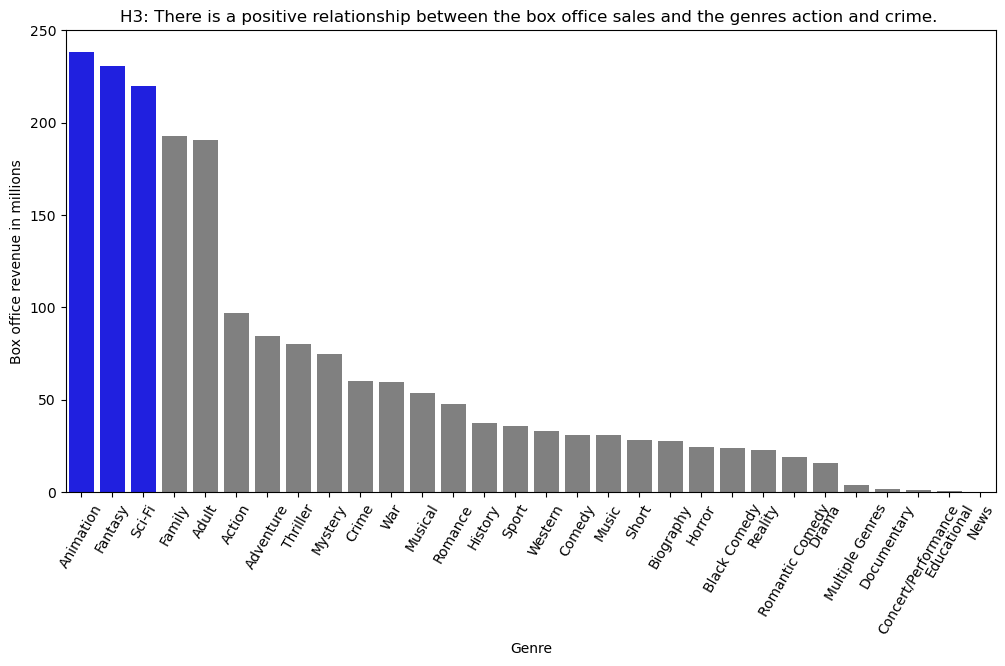

In [31]:
#Here I create a Barplot with genres on the X-axis and the average box office revenue per genre on the Y-axis.
plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='genre_name', y='box_office_revenue', palette = ['grey' if (x < 200) else 'Blue' for x in df1['box_office_revenue']]) 
plt.xticks(rotation=60)
plt.xlabel('Genre')
plt.ylabel('Box office revenue in millions')
plt.title('H4: There is a positive relationship between the box office sales and the genres action and crime. ')
plt.show()